# Exercise 3

Use logistic regression to predict the probability of a passenger surviving.

https://www.kaggle.com/competitions/titanic/overview

In [43]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


## Dataset File

In [44]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/train.csv?raw=true'
df = pd.read_csv(dataset_url)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check if there is any Mising values, and if so drop

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [47]:
df.drop('Cabin' , axis=1, inplace=True)
df.drop('Embarked' , axis=1, inplace=True)
df.drop('Name' , axis=1, inplace=True)
df.drop('Ticket' , axis=1, inplace=True)
df.drop('SibSp' , axis=1, inplace=True)
df.drop('Parch' , axis=1, inplace=True)
df.drop('Fare' , axis=1, inplace=True)

In [48]:
df.fillna(df['Age'].mean(), inplace=True)

In [49]:
df = df[['Survived', 'Age', 'Sex', 'Pclass']]
df = pd.get_dummies(df, columns=['Sex', 'Pclass'])

In [50]:
df.head()

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,False,True,False,False,True
1,1,38.0,True,False,True,False,False
2,1,26.0,True,False,False,False,True
3,1,35.0,True,False,True,False,False
4,0,35.0,False,True,False,False,True


## Train-Test Split

In [51]:
x = df.drop('Survived', axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [52]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [53]:
model.score(x_test, y_test)

0.8044692737430168

## Visualization


In [54]:
y_predicted = model.predict(x_test)
confusion_matrix(y_test, y_predicted)

array([[97, 13],
       [22, 47]])

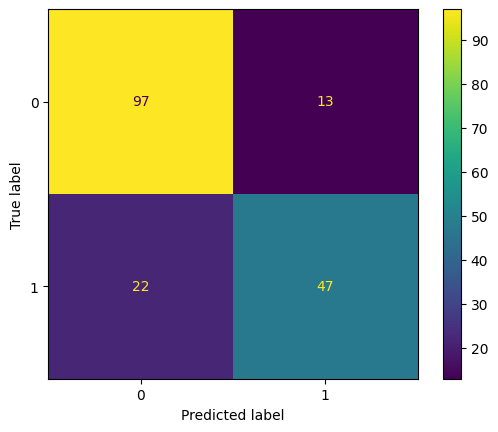

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)

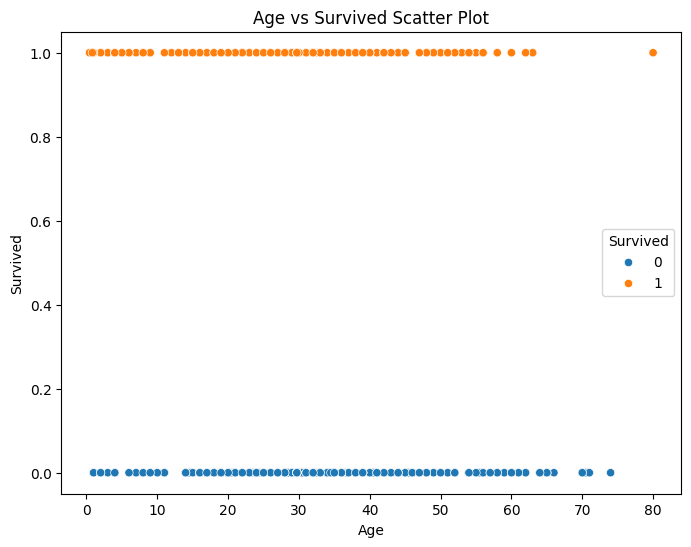

In [56]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Survived', hue='Survived')
plt.title('Age vs Survived Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

## Test File

In [57]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/test.csv?raw=true'
dt=pd.read_csv(test_url)

In [58]:
dt.drop('Cabin' , axis=1, inplace=True)
dt.drop('Embarked' , axis=1, inplace=True)
dt.drop('Name' , axis=1, inplace=True)
dt.drop('Ticket' , axis=1, inplace=True)
dt.drop('SibSp' , axis=1, inplace=True)
dt.drop('Parch' , axis=1, inplace=True)
dt.drop('Fare' , axis=1, inplace=True)

In [59]:
dt.fillna(df['Age'].mean(), inplace=True)

## Sample Submission File

In [60]:
sample_submission_url ='https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/gender_submission.csv?raw=true'

sf=pd.read_csv(sample_submission_url)

In [61]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


## Generate Results

In [62]:
dt = dt[['PassengerId', 'Age', 'Sex', 'Pclass']]
dt = pd.get_dummies(dt, columns=['Sex', 'Pclass'])

id = dt.pop('PassengerId')

y_pred = model.predict(dt)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'PassengerID': id,
    'Survived': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
